# Govind Lowanshi

# Intern @ GRIP Spark Foundation

# Exploratory Data Analysis - Retail

# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams["figure.figsize"] = (12,8)

# Import the dataset

In [3]:
data = pd.read_csv("C:/Users/Baccchi/Desktop/gogo/SampleSuperstore22.csv")
retail_data = data.copy()
retail_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Data Exploration

In [4]:
retail_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# There are no missing values in the whole dataset

In [5]:
retail_data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [6]:
retail_data.shape

(9994, 13)

In [7]:
retail_data = retail_data.drop_duplicates()
retail_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [9]:
retail_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


# Detecting Outliers within Data Distributions

In [10]:
def findOutliers(data):
    anomalies = []
    std_data = data.std()
    mean_data = data.mean()
    outlier_cutoff = std_data*3
    lower_limit = mean_data - outlier_cutoff
    upper_limit = mean_data + outlier_cutoff
    #Generate outliers
    for outlier in data:
        if outlier>upper_limit or outlier<lower_limit:
            anomalies.append(outlier)
    return anomalies

In [11]:
sorted(findOutliers(retail_data['Discount']))

[0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8

In [12]:
# Function to find outliers using Inter-Quartile Range(IQR) method
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below lower and above upper bound values respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])
# Function to find outliers using Z-score method
# def out_zscore(data):
#     global outliers,zscore
#     outliers = []
#     zscore = []
#     threshold = 3
#     mean = np.mean(data)
#     std = np.std(data)
#     for i in data:
#         z_score= (i - mean)/std 
#         zscore.append(z_score)
#         if np.abs(z_score) > threshold:
#             outliers.append(i)
#     return print("Total number of outliers are",len(outliers))

In [13]:
out_iqr(retail_data,'Discount')

The IQR is 0.2
The lower bound value is -0.30000000000000004
The upper bound value is 0.5
Total number of outliers are 855


<AxesSubplot:xlabel='Discount'>

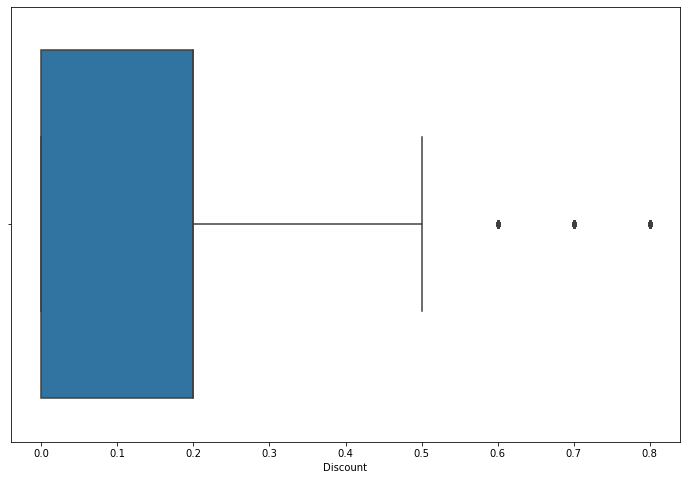

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(retail_data['Discount'])

# As we can see, there are three outlier groups within the data distribution of Discount numerical variables.

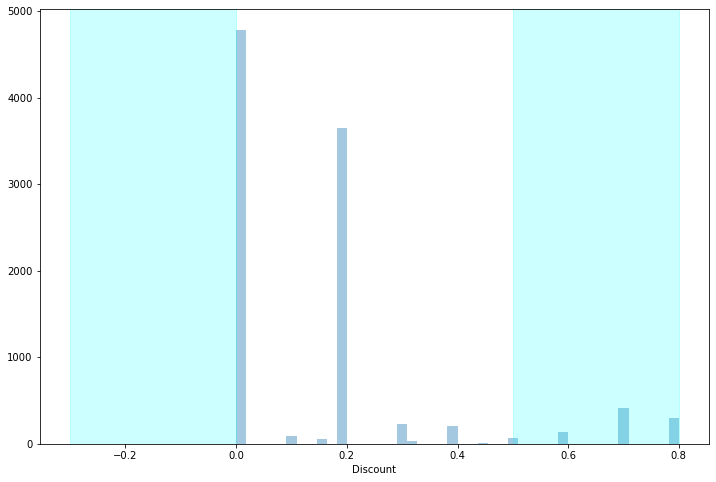

In [15]:
plt.figure(figsize=(12,8))
sns.distplot(retail_data['Discount'],kde=False)
plt.axvspan(xmin=lower,xmax=retail_data['Discount'].min(),alpha=0.2,color='cyan')
plt.axvspan(xmin=upper,xmax=retail_data['Discount'].max(),alpha=0.2,color='cyan')

# Removing Discount Outliers

In [16]:
retail_data = retail_data[(retail_data['Discount']>lower)&(retail_data['Discount']<upper)]
retail_data.sample(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3144,Standard Class,Corporate,United States,Austin,Texas,78745,Central,Furniture,Chairs,347.802,7,0.30,-24.8430
5858,Second Class,Consumer,United States,Concord,California,94521,West,Furniture,Bookcases,239.666,2,0.15,14.0980
9352,First Class,Consumer,United States,Chicago,Illinois,60623,Central,Furniture,Chairs,520.464,2,0.30,-14.8704
515,Standard Class,Home Office,United States,Great Falls,Montana,59405,West,Technology,Copiers,2999.950,5,0.00,1379.9770
9940,Standard Class,Corporate,United States,New York City,New York,10009,East,Office Supplies,Art,11.200,7,0.00,4.8160
9094,Standard Class,Consumer,United States,Detroit,Michigan,48227,Central,Office Supplies,Binders,403.680,6,0.00,181.6560
3334,First Class,Consumer,United States,Oakland,California,94601,West,Office Supplies,Art,17.120,4,0.00,4.9648
3631,Second Class,Corporate,United States,Los Angeles,California,90004,West,Office Supplies,Storage,69.520,2,0.00,19.4656
2659,Standard Class,Corporate,United States,Gilbert,Arizona,85234,West,Furniture,Chairs,883.840,4,0.20,99.4320
3937,Standard Class,Consumer,United States,Grand Prairie,Texas,75051,Central,Office Supplies,Paper,27.216,3,0.20,9.8658


In [17]:
retail_data.shape

(9056, 13)

In [18]:
sorted(findOutliers(retail_data['Sales']))

[2033.5839999999998,
 2036.86,
 2054.272,
 2060.744,
 2065.32,
 2079.4,
 2104.55,
 2152.776,
 2154.9,
 2239.936,
 2244.48,
 2249.91,
 2249.91,
 2254.41,
 2275.5,
 2279.96,
 2309.65,
 2314.116,
 2321.9,
 2348.82,
 2357.488,
 2395.2,
 2396.2656,
 2396.4,
 2399.6,
 2399.96,
 2399.96,
 2404.7039999999997,
 2405.2,
 2430.08,
 2453.43,
 2479.96,
 2504.74,
 2518.29,
 2519.958,
 2541.98,
 2548.56,
 2563.056,
 2567.84,
 2573.82,
 2575.944,
 2591.56,
 2621.322,
 2625.12,
 2665.62,
 2676.672,
 2678.94,
 2690.97,
 2715.93,
 2735.952,
 2793.528,
 2799.9440000000004,
 2799.96,
 2799.96,
 2799.96,
 2799.96,
 2803.92,
 2803.92,
 2807.84,
 2879.952,
 2887.0559999999996,
 2888.127,
 2934.33,
 2939.93,
 2973.32,
 2999.95,
 2999.95,
 3023.928,
 3040.0,
 3050.3759999999997,
 3059.982,
 3059.982,
 3080.0,
 3149.93,
 3266.3759999999997,
 3347.37,
 3357.6,
 3359.952,
 3393.68,
 3404.5,
 3406.664,
 3499.93,
 3504.9,
 3610.848,
 3785.292,
 3812.97,
 3930.072,
 3991.98,
 3999.95,
 4007.84,
 4158.912,
 4164.05,
 

In [19]:
np.sort(findOutliers(retail_data['Profit']),kind='mergesort')

array([-1862.3124, -1359.992 , -1049.3406, -1002.7836,  -968.8833,
        -786.0144,  -734.5264,  -653.2834,  -630.882 ,  -619.596 ,
         673.8816,   679.996 ,   682.5168,   694.5015,   700.98  ,
         701.9883,   726.5619,   735.0336,   742.632 ,   742.632 ,
         743.988 ,   746.4078,   751.7601,   751.9624,   757.4112,
         757.4112,   762.1845,   762.594 ,   764.3818,   767.2005,
         770.352 ,   792.2691,   793.716 ,   829.3754,   839.986 ,
         843.1706,   843.1706,   843.1706,   874.9875,   884.058 ,
         899.982 ,   909.9818,   942.8157,   944.9865,   944.9865,
        1007.9832,  1013.127 ,  1014.9797,  1049.985 ,  1061.5722,
        1114.512 ,  1119.9968,  1143.891 ,  1159.9855,  1228.1787,
        1264.7559,  1270.99  ,  1276.4871,  1351.9896,  1371.9804,
        1379.977 ,  1415.4296,  1416.8   ,  1439.976 ,  1453.1238,
        1459.2   ,  1480.4671,  1644.2913,  1668.205 ,  1906.485 ,
        1906.485 ,  1995.99  ,  2229.024 ,  2239.9872,  2302.9

<AxesSubplot:>

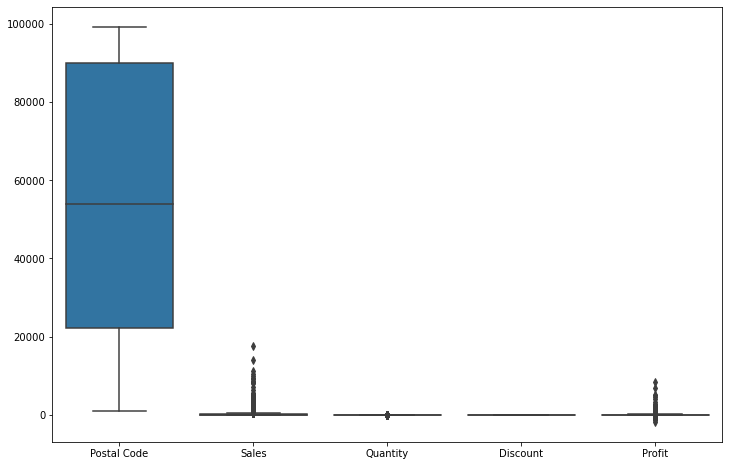

In [20]:
sns.boxplot(data=retail_data)

In [21]:
out_iqr(retail_data,'Sales')

The IQR is 209.864
The lower bound value is -295.116
The upper bound value is 544.34
Total number of outliers are 1017


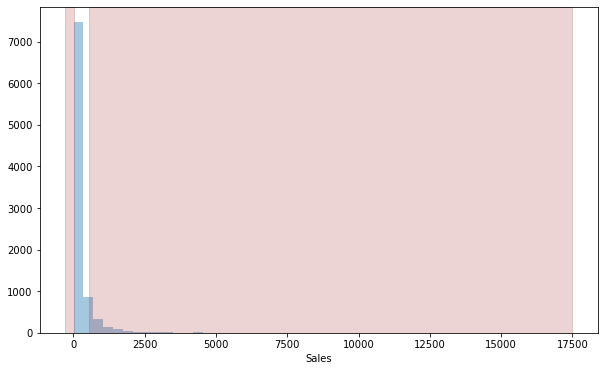

In [22]:
plt.figure(figsize=(10,6))
sns.distplot(retail_data['Sales'],kde=False)
plt.axvspan(xmin=lower,xmax=retail_data['Sales'].min(),alpha=0.2,color='brown')
plt.axvspan(xmin=upper,xmax=retail_data['Sales'].max(),alpha=0.2,color='brown')

# Removing Sales Outliers

In [23]:
retail_data = retail_data[(retail_data['Sales']>lower)&(retail_data['Sales']<upper)]
retail_data.sample(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6194,Standard Class,Consumer,United States,Houston,Texas,77095,Central,Office Supplies,Paper,75.880,5,0.2,26.5580
6259,Second Class,Consumer,United States,Richmond,Indiana,47374,Central,Office Supplies,Binders,11.360,4,0.0,5.5664
8931,Standard Class,Corporate,United States,Milwaukee,Wisconsin,53209,Central,Furniture,Furnishings,99.950,5,0.0,22.9885
8196,Standard Class,Consumer,United States,Knoxville,Tennessee,37918,South,Technology,Accessories,89.568,4,0.2,-1.1196
8256,Standard Class,Consumer,United States,Seattle,Washington,98103,West,Office Supplies,Storage,46.740,3,0.0,11.6850
2392,Standard Class,Consumer,United States,New York City,New York,10009,East,Furniture,Furnishings,113.920,4,0.0,42.1504
7254,Standard Class,Home Office,United States,Superior,Wisconsin,54880,Central,Furniture,Furnishings,47.400,5,0.0,21.3300
856,Standard Class,Consumer,United States,New York City,New York,10035,East,Office Supplies,Supplies,102.300,10,0.0,26.5980
195,Standard Class,Consumer,United States,Hamilton,Ohio,45011,East,Office Supplies,Art,7.408,2,0.2,1.2038
5107,First Class,Home Office,United States,Nashville,Tennessee,37211,South,Office Supplies,Art,42.048,9,0.2,5.2560


# Removing Profit Outliers

In [24]:
out_iqr(retail_data,'Profit')

The IQR is 21.005300000000002
The lower bound value is -28.243650000000002
The upper bound value is 55.777550000000005
Total number of outliers are 1119


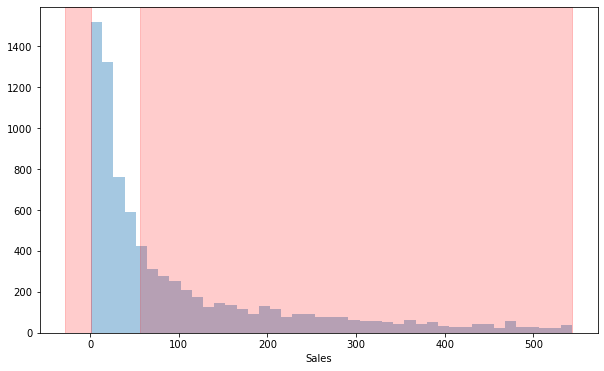

In [25]:
plt.figure(figsize=(10,6))
sns.distplot(retail_data['Sales'],kde=False)
plt.axvspan(xmin=lower,xmax=retail_data['Sales'].min(),alpha=0.2,color='red')
plt.axvspan(xmin=upper,xmax=retail_data['Sales'].max(),alpha=0.2,color='red')

# The box plots suggest that there are several outliers in the data distributions of Sales and Profit numerical variables.

In [26]:
retail_data = retail_data[(retail_data['Profit']>lower)&(retail_data['Profit']<upper)]
retail_data.sample(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9210,Second Class,Home Office,United States,Burlington,Iowa,52601,Central,Office Supplies,Binders,5.400,3,0.0,2.5920
7366,Standard Class,Corporate,United States,Philadelphia,Pennsylvania,19140,East,Office Supplies,Storage,32.544,2,0.2,-7.7292
7506,Standard Class,Consumer,United States,San Francisco,California,94122,West,Technology,Phones,46.384,2,0.2,5.2182
6719,First Class,Consumer,United States,Goldsboro,North Carolina,27534,South,Office Supplies,Appliances,34.944,3,0.2,3.0576
5506,Same Day,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,61.960,2,0.0,27.8820
4285,Second Class,Corporate,United States,Port Arthur,Texas,77642,Central,Office Supplies,Labels,11.696,2,0.2,3.9474
6098,Standard Class,Consumer,United States,New York City,New York,10035,East,Office Supplies,Fasteners,4.360,2,0.0,1.7876
5195,Second Class,Corporate,United States,Columbia,South Carolina,29203,South,Office Supplies,Binders,45.660,3,0.0,22.3734
7440,Standard Class,Consumer,United States,Los Angeles,California,90049,West,Furniture,Tables,236.528,2,0.2,-2.9566
7793,Second Class,Corporate,United States,Las Vegas,Nevada,89115,West,Office Supplies,Paper,32.400,5,0.0,15.8760


In [27]:
retail_data.shape

(6920, 13)

# Univariate Analysis

In [28]:
retail_data.head(8)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.0,41.9136
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7,0.0,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.280,4,0.0,1.9656
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.504,3,0.2,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.900,5,0.0,34.4700
12,Standard Class,Consumer,United States,Concord,North Carolina,28027,South,Office Supplies,Paper,15.552,3,0.2,5.4432


# Ship Mode

<AxesSubplot:ylabel='Ship Mode'>

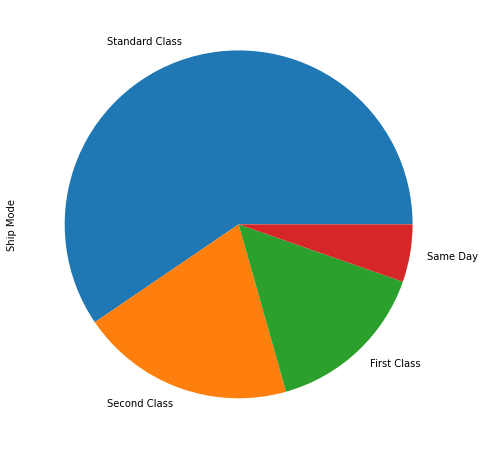

In [29]:
retail_data['Ship Mode'].value_counts().plot(kind='pie')

<AxesSubplot:>

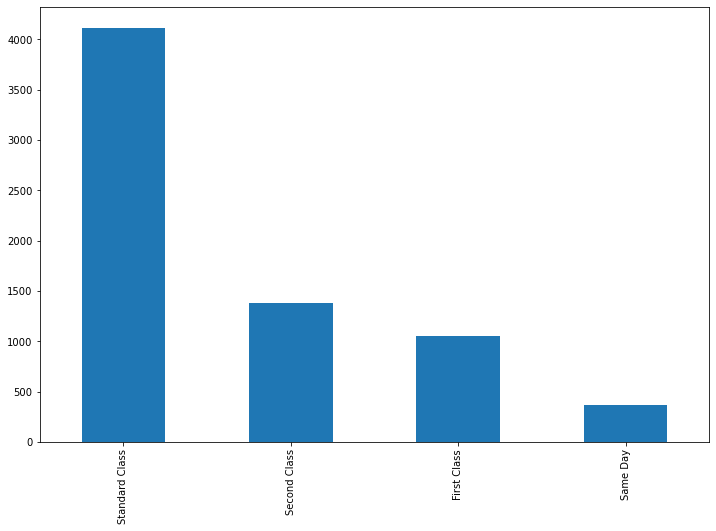

In [30]:
retail_data['Ship Mode'].value_counts().plot(kind='bar')

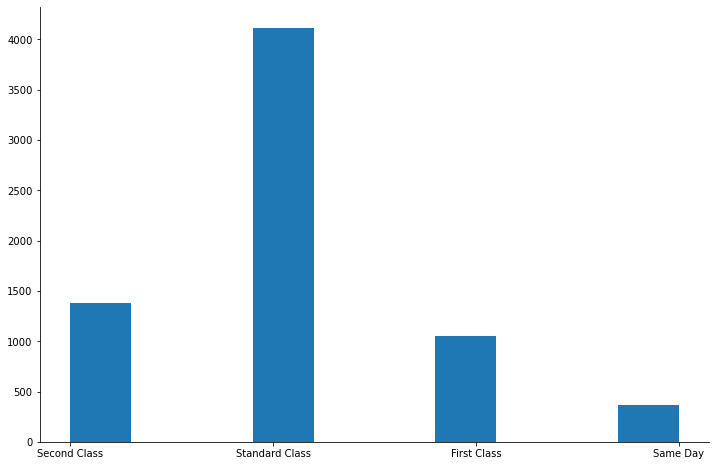

In [31]:
retail_data['Ship Mode'].hist()
sns.despine()
plt.grid(False)

# Most of the retail sales have occurred using "Standard Class" shipping mode, while "Same Day" shipping mode has been used the least.

# Segment

<AxesSubplot:ylabel='Segment'>

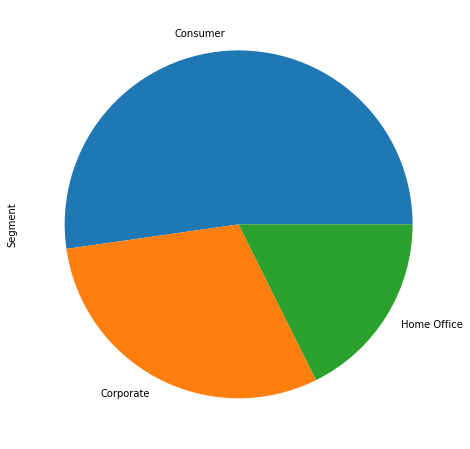

In [32]:
retail_data['Segment'].value_counts().plot(kind='pie')

<AxesSubplot:>

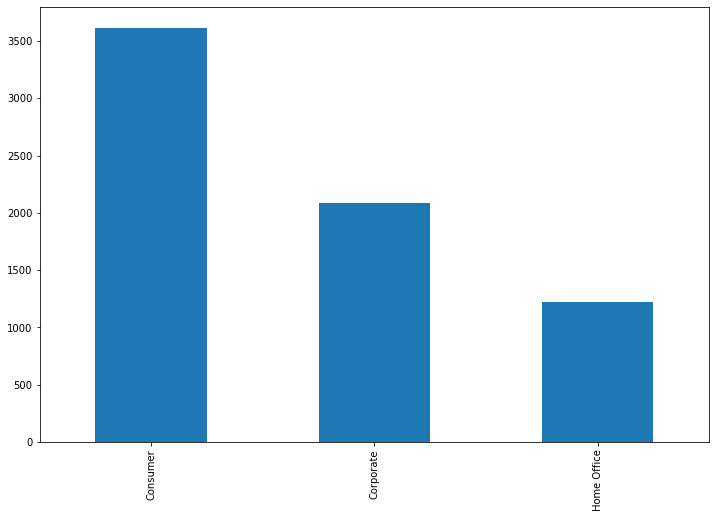

In [33]:
retail_data['Segment'].value_counts().plot(kind='bar')

# As expected, among all the segments, consumers have bought the most number of products, while people of home office bought minimum number of products.

# City

In [34]:
retail_data['City'].value_counts()

New York City    681
Los Angeles      592
San Francisco    401
Seattle          334
Philadelphia     329
                ... 
Goldsboro          1
La Quinta          1
Baytown            1
Springdale         1
Frankfort          1
Name: City, Length: 499, dtype: int64

# Maximum retail sales occurred in New York City, while minimum retail sales occurred in Manhattan.

# Insight 1: Price and quantity of each sale must be increased in cities having higher number of sales like New York City, Los Angeles, etc., while number of sales must be improved in cities having low number of sales like Manhattan, Palatine, etc.

In [35]:
retail_data['City'].nunique()

499

# State

In [36]:

retail_data['State'].nunique()

48

In [37]:
retail_data['State'].value_counts()

California              1574
New York                 839
Texas                    547
Washington               393
Pennsylvania             357
Ohio                     298
Florida                  258
Illinois                 248
Michigan                 179
North Carolina           169
Virginia                 157
Arizona                  141
Georgia                  130
Tennessee                127
Colorado                 112
Indiana                  106
Kentucky                  97
New Jersey                95
Massachusetts             91
Oregon                    87
Maryland                  75
Wisconsin                 72
Delaware                  68
Minnesota                 67
Connecticut               62
Missouri                  54
Oklahoma                  43
Alabama                   42
Arkansas                  42
Utah                      41
Rhode Island              39
Mississippi               36
South Carolina            32
Louisiana                 32
New Mexico    

# Insight 2: Number of sales must be increased in states having very low number of sales like Wyoming, West Virginia, etc., whereas for states having maximum number of sales like California, New York, etc., quantity of sales must be enhanced.


Postal code variable is unnecessary from the context of our analysis so we can drop it from the dataset.

In [38]:
retail_data.drop(['Postal Code'],axis=1,inplace=True)

In [39]:
retail_data.shape

(6920, 12)

In [40]:
retail_data.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.960,2,0.0,41.9136
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,48.860,7,0.0,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Art,7.280,4,0.0,1.9656


# Region

In [41]:
retail_data['Region'].value_counts()

West       2434
East       1960
Central    1404
South      1122
Name: Region, dtype: int64

<AxesSubplot:ylabel='Region'>

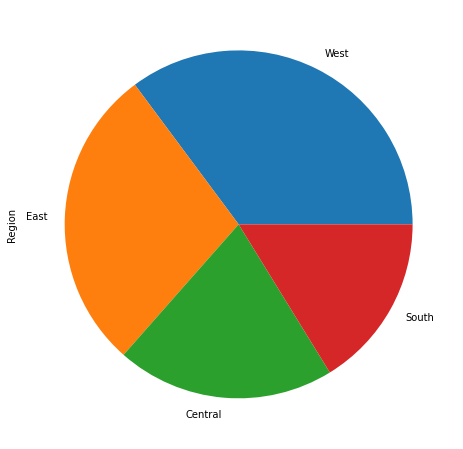

In [42]:
retail_data['Region'].value_counts().plot(kind='pie')

<AxesSubplot:>

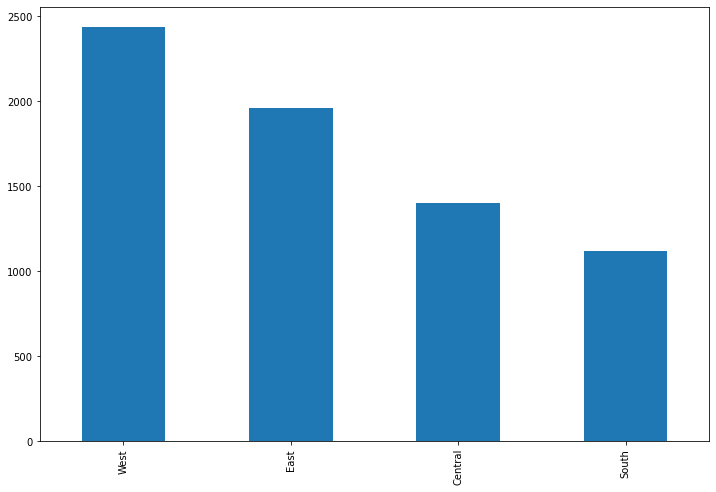

In [43]:
retail_data['Region'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Number of Sales per Region')

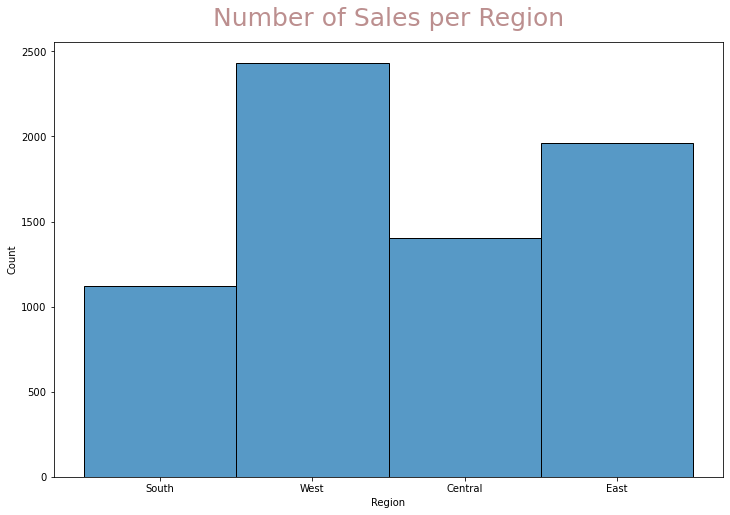

In [44]:
sns.histplot(x=retail_data['Region'])
plt.title('Number of Sales per Region',fontsize=25,color='rosybrown',pad=16)

# Maximum sales have occurred in the West region, while minimum sales have occurred in the South region.

# Category

In [45]:
retail_data['Category'].value_counts()

Office Supplies    4593
Furniture          1194
Technology         1133
Name: Category, dtype: int64

<AxesSubplot:ylabel='Category'>

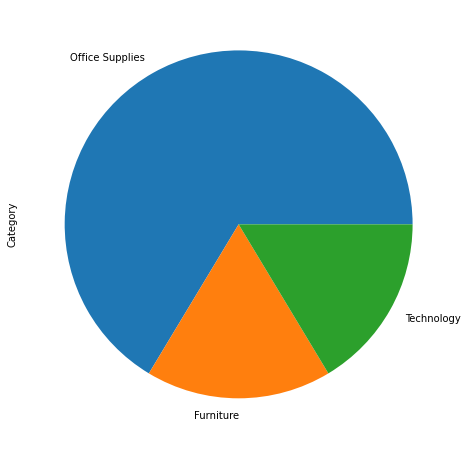

In [46]:
retail_data.Category.value_counts().plot(kind='pie')

Text(0.5, 1.0, 'Count per Category')

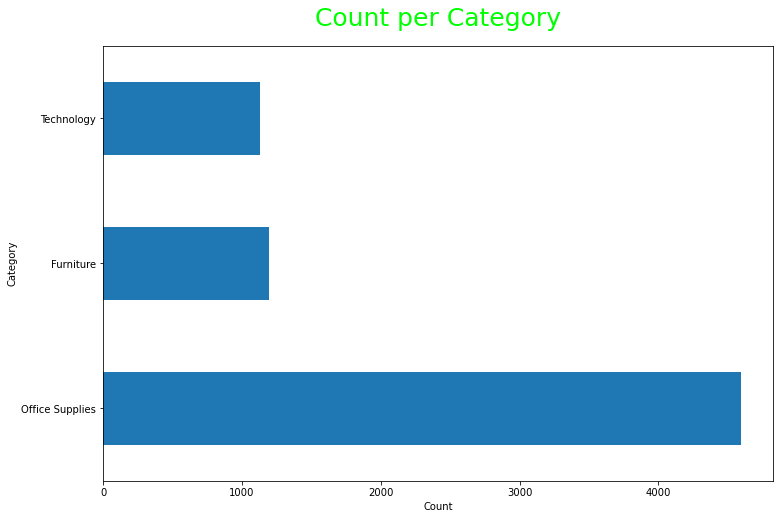

In [47]:
retail_data.Category.value_counts().plot(kind='barh')
plt.ylabel('Category')
plt.xlabel('Count')
plt.title('Count per Category',fontsize=25,color='lime',pad=20)

<AxesSubplot:>

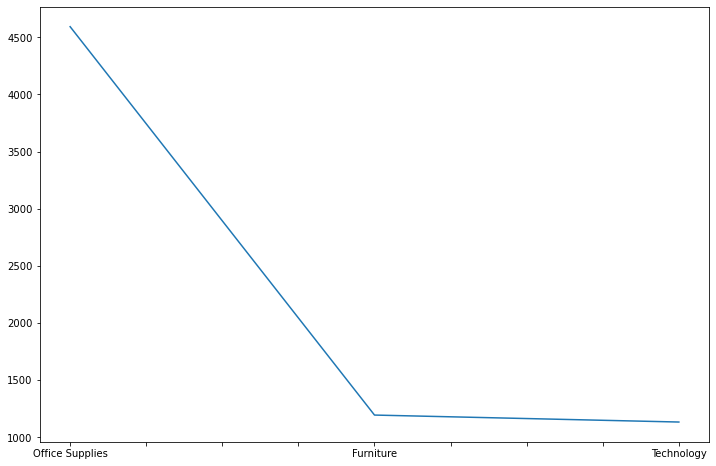

In [48]:
retail_data.Category.value_counts().plot(kind='line')

# Office Supplies had the maximum number of sales, while technology sector had the minimum number of sales.

Text(0.5, 1.0, 'Sales per Category')

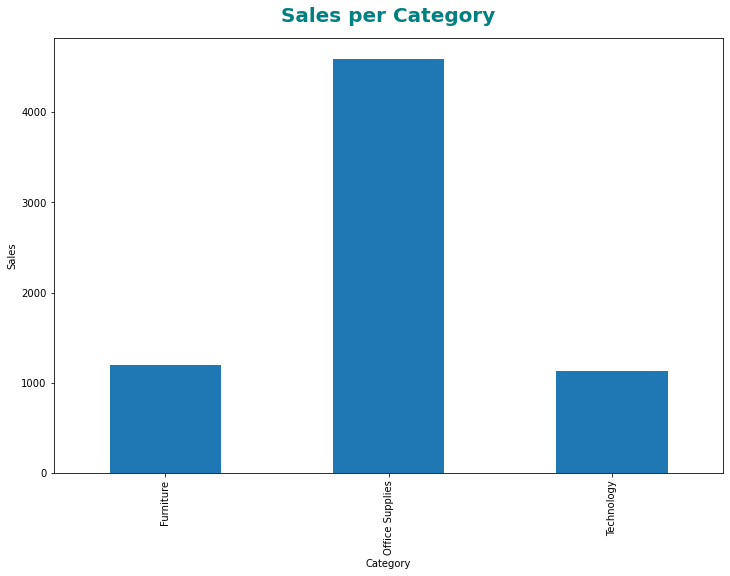

In [49]:
retail_data.groupby('Category')['Sales'].count().plot(kind='bar')
plt.ylabel('Sales')
plt.title('Sales per Category',fontsize=20,color='teal',pad=16,fontweight='bold')

Text(0.5, 1.0, 'Profit per Category')

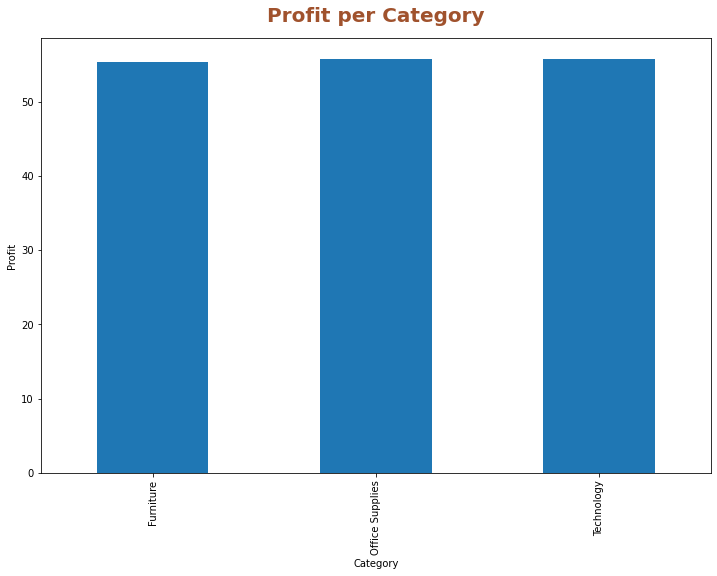

In [50]:
retail_data.groupby('Category')['Profit'].max().plot(kind='bar')
plt.ylabel('Profit')
plt.title('Profit per Category',fontsize=20,color='sienna',pad=16,fontweight='bold')

# Insight 3: Sales must be increased for the Technology sector in order to maximise profit.

Text(0.5, 1.0, 'Discount per Category')

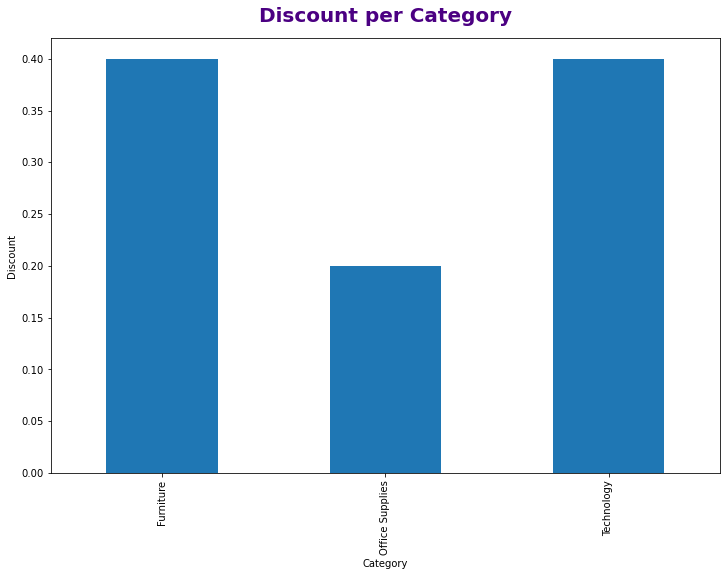

In [51]:
retail_data.groupby('Category')['Discount'].max().plot(kind='bar')
plt.ylabel('Discount')
plt.title('Discount per Category',fontsize=20,color='indigo',pad=16,fontweight='bold')

In [52]:
retail_data.groupby('Category')['Discount'].value_counts().sort_values(ascending=False)

Category         Discount
Office Supplies  0.00        2615
                 0.20        1968
Technology       0.20         616
Furniture        0.00         580
Technology       0.00         461
Furniture        0.20         439
                 0.30          93
Technology       0.40          55
Furniture        0.10          36
                 0.15          32
Office Supplies  0.10          10
Furniture        0.32           8
                 0.40           6
Technology       0.30           1
Name: Discount, dtype: int64

# Insight 4: Quantity of sales for Office Supplies must be increased in order to maximize total profit as they generate minimum discount.

# Sub-Category

In [53]:
retail_data['Sub-Category'].value_counts()

Paper          1200
Art             781
Binders         770
Furnishings     728
Storage         610
Accessories     564
Phones          553
Labels          348
Chairs          297
Appliances      280
Envelopes       217
Fasteners       217
Supplies        170
Bookcases        99
Tables           70
Machines         16
Name: Sub-Category, dtype: int64

In [54]:
retail_data['Sub-Category'].describe()

count      6920
unique       16
top       Paper
freq       1200
Name: Sub-Category, dtype: object

# Binders sub-category has had the maximum number of sales among a total of 17 unique sub-categories

Text(0.5, 1.0, 'Sales per Sub-Category')

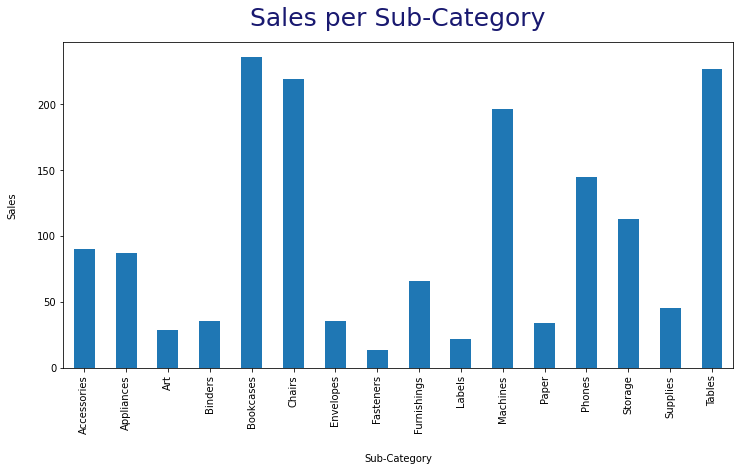

In [55]:
plt.figure(figsize=(12,6))
retail_data.groupby('Sub-Category')['Sales'].mean().plot(kind='bar')
plt.ylabel('Sales',labelpad=20)
plt.xlabel('Sub-Category',labelpad=20)
plt.title('Sales per Sub-Category',fontsize=25,color='midnightblue',pad=16)

# At an average, Copiers sub-category generates maximum sales amount, while Fasteners generate minimum sales amount

In [57]:
retail_data.groupby('Sub-Category')['Profit'].max().sort_values(ascending=False)

Sub-Category
Paper          55.7640
Phones         55.7450
Binders        55.5822
Furnishings    55.3896
Appliances     55.3616
Tables         54.7756
Accessories    54.7425
Bookcases      54.7136
Chairs         54.6660
Art            54.5844
Storage        54.5832
Machines       53.2720
Labels         51.8000
Envelopes      51.7590
Supplies       36.8130
Fasteners      21.8880
Name: Profit, dtype: float64

# Insight 5: Quantity of sales for Copiers sub-category should be enhanced as much as possible as they generate maximum profit.

# Sales

In [58]:
np.max(retail_data['Sales'])

544.008

In [59]:
np.min(retail_data['Sales'])

0.99

In [61]:
np.median(retail_data['Sales'])

35.97

In [62]:
np.std(retail_data['Sales'])

92.37123524096097

In [63]:
np.percentile(retail_data['Sales'],90)

186.54

In [64]:
np.quantile(retail_data['Sales'],0.6).round(2)

50.0

In [65]:
np.round(np.mean(retail_data['Sales']),2)

71.86

In [66]:
retail_data['Sales'].skew()

2.4248750765446054

In [67]:
retail_data['Sales'].kurtosis()

6.368851206451053

# High value of kurtosis suggests that there are many outliers present in the distribution of "Sales" numerical variable

Text(0.5, 0, 'Sales')

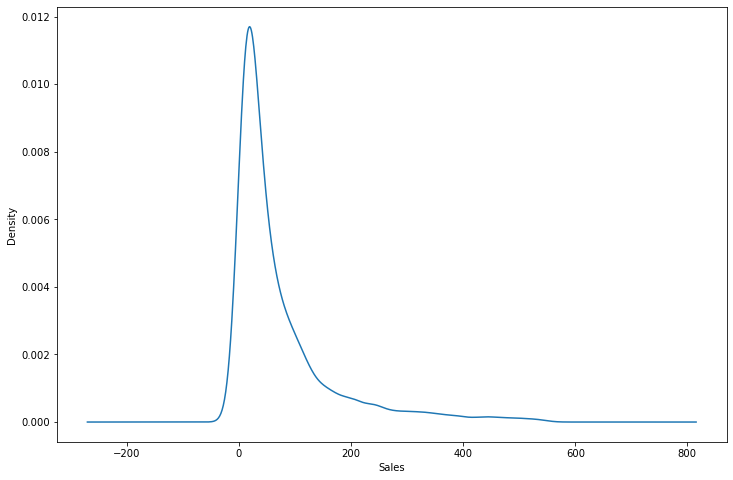

In [69]:
retail_data['Sales'].plot(kind='kde')
plt.xlabel('Sales')

# The distributon of sales numerical variable is positively skewed, i.e. it's tail is longer from the right side

# Quantity

Text(0.5, 1.0, 'Frequency distribution of Quantity')

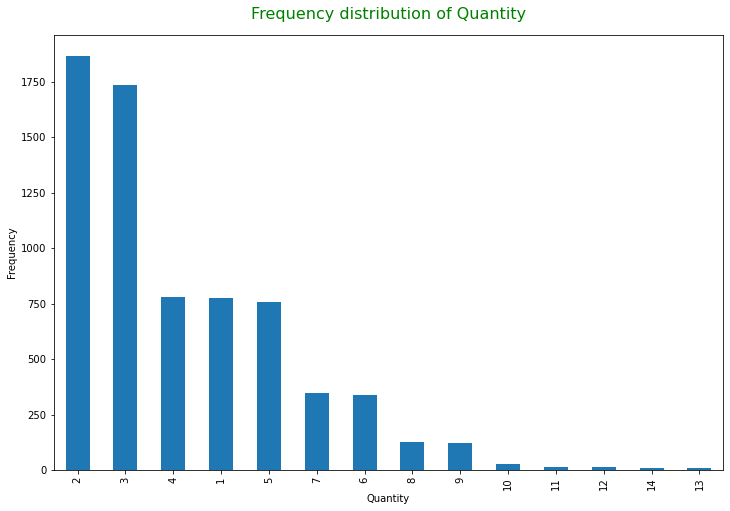

In [70]:
plt.figure(figsize=(12,8))
retail_data['Quantity'].value_counts().plot(kind='bar')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Frequency distribution of Quantity',fontsize=16,color='green',pad=16)

# Most of the products have been sold in quantities of 2 or 3

In [71]:
np.round(np.mean(retail_data['Quantity']))

3.0

# At an average, nearly 4 quantities of each sales category have been generated.

In [73]:
np.max(retail_data['Quantity'])

14

In [74]:
np.min(retail_data['Quantity'])

1

In [75]:
retail_data['Quantity'].skew().round(2)

1.33

In [76]:
retail_data['Quantity'].kurtosis().round(2)

2.18

# Discount

In [77]:
retail_data['Discount'].max()

0.4

In [78]:
retail_data['Discount'].min()

0.0

In [79]:
retail_data['Discount'].skew()

0.32527379264512474

In [80]:
retail_data['Discount'].kurtosis()

-1.3881467915130135

In [81]:
np.round(retail_data['Discount'].mean(),2)

0.1

# For an average sale, atleast 16% discount has been provided.

In [83]:
np.round(retail_data['Discount'].std(),2)

0.11

In [84]:
np.round(retail_data['Discount'].median(),2)

0.0

Text(0.5, 0, 'Discount')

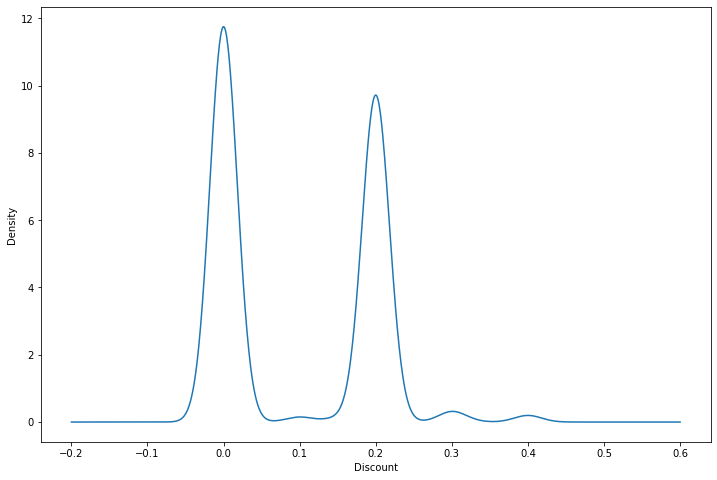

In [85]:
retail_data['Discount'].plot(kind='kde')
plt.xlabel('Discount')

In [86]:
retail_data['Discount'].unique()

array([0.  , 0.2 , 0.3 , 0.1 , 0.4 , 0.15, 0.32])

# Profit

In [87]:
np.round(np.mean(retail_data['Profit']),2)

12.13

In [88]:
np.round(np.max(retail_data['Profit']),2)

55.76

In [89]:
np.round(np.min(retail_data['Profit']),2)


-28.22

In [90]:
np.round(np.median(retail_data['Profit']),2)

8.19

In [91]:
np.round(np.std(retail_data['Profit']),2)

14.2

In [92]:
np.round(np.var(retail_data['Profit']),2)

201.56

In [93]:

np.round(np.sum(retail_data['Profit']),2)

83937.84

In [94]:
retail_data['Profit'].skew()

0.8791905122920103

In [95]:
retail_data['Profit'].kurtosis()

1.068063760099479

Text(0.5, 0, 'Profit')

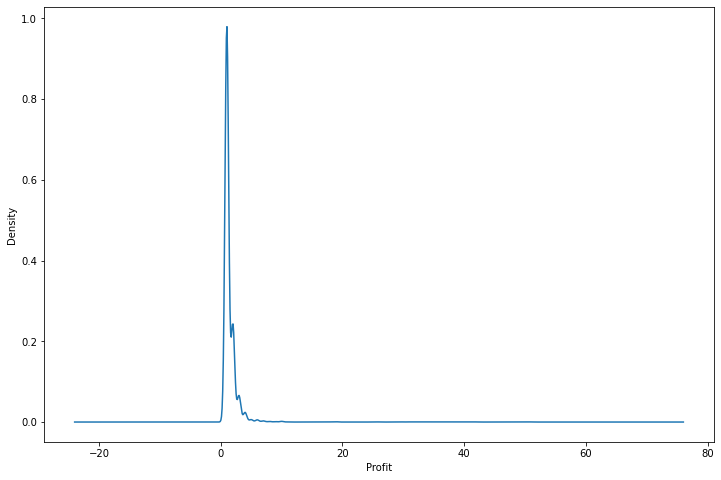

In [96]:
retail_data['Profit'].value_counts().plot(kind='kde')
plt.xlabel('Profit')

# Multivariate Analysis

<Figure size 1440x960 with 0 Axes>

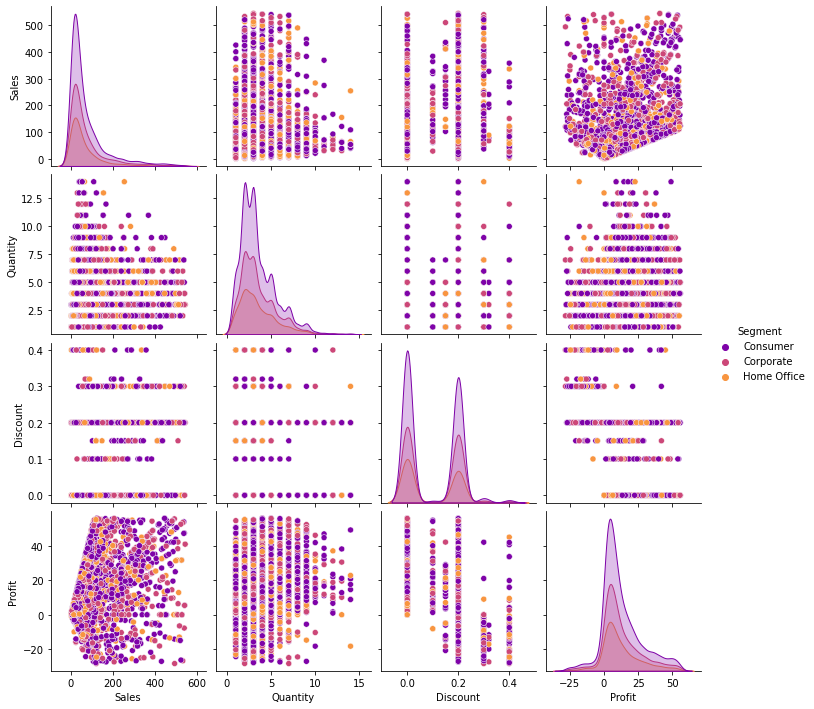

In [97]:
plt.figure(dpi=120)
sns.pairplot(retail_data,hue='Segment',palette='plasma')
plt.show()

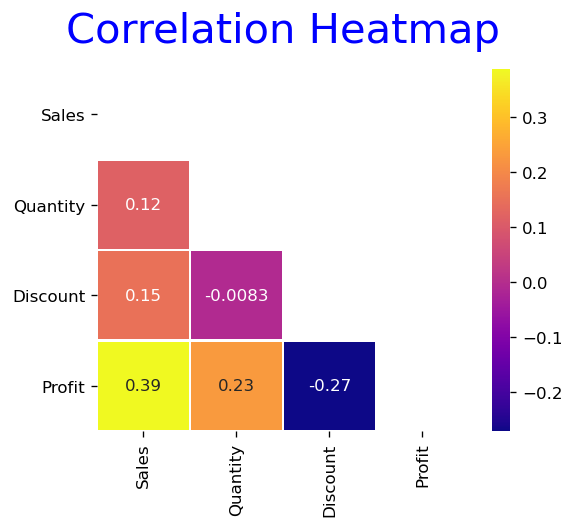

In [98]:
plt.figure(dpi=120,figsize=(5,4))
mask = np.triu(np.ones_like(retail_data.corr(),dtype=bool))
sns.heatmap(retail_data.corr(),mask=mask,annot=True,lw=1,cmap='plasma')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Heatmap',fontsize=25,color='blue',pad=16)
plt.show()


Correlation between Sales and Quantity ==> 0.1165726974639888


<Figure size 500x400 with 0 Axes>

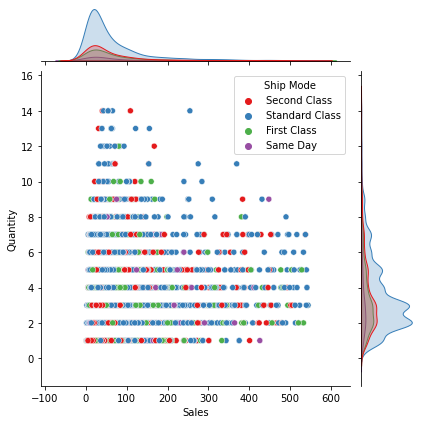

Correlation between Sales and Discount ==> 0.15220763136580553


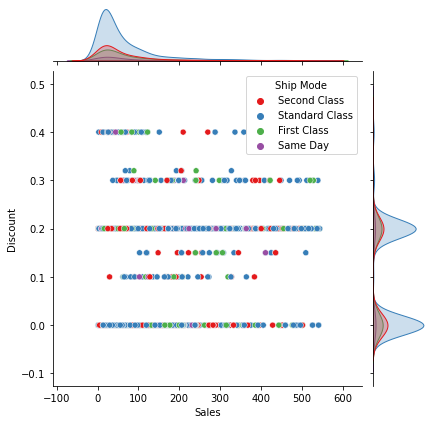

Correlation between Sales and Profit ==> 0.3880717876417563


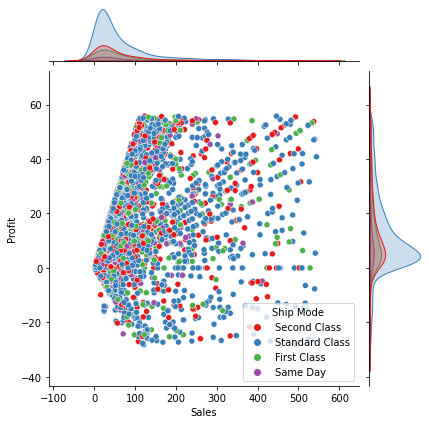

In [99]:
col = list(retail_data.columns)
idx = col.index('Sales')

plt.figure(dpi=100,figsize=(5,4))
for i in range(idx+1,len(col)):
    print("Correlation between Sales and {0} ==>".format(col[i]),retail_data.corr().loc['Sales'][col[i]])
    sns.jointplot(x='Sales',y=col[i],data=retail_data,kind='scatter',hue='Ship Mode',palette='Set1')
    plt.show()

Correlation between Quantity and Sales ==> 0.1165726974639888


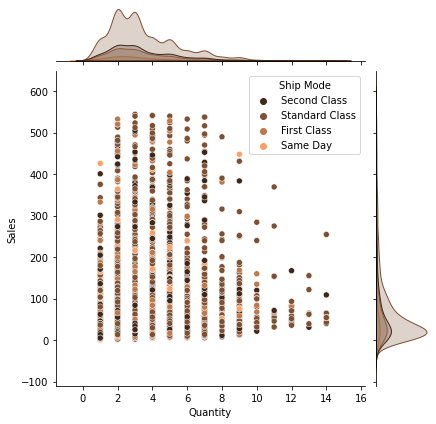

Correlation between Quantity and Discount ==> -0.00828002816948875


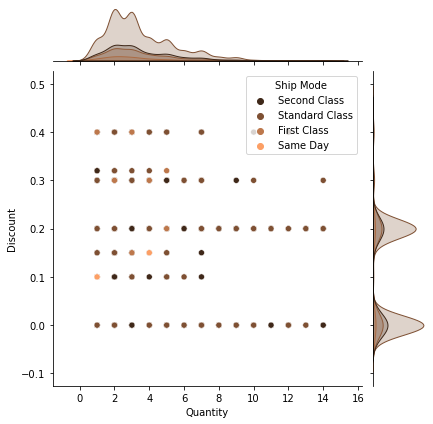

Correlation between Quantity and Profit ==> 0.23279549721092968


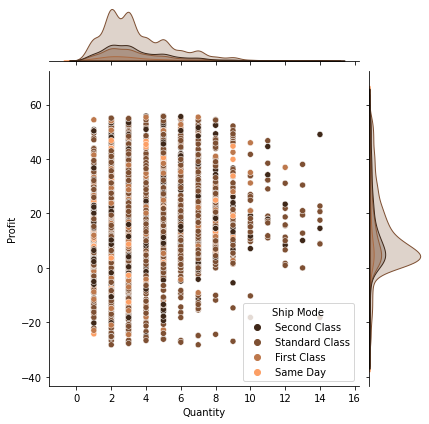

In [100]:
idx = col.index('Sales')
curr_idx = col.index('Quantity')
for i in range(idx,len(col)):
    if i!=curr_idx:
        print("Correlation between Quantity and {} ==>".format(col[i]),retail_data.corr().loc['Quantity'][col[i]])
        sns.jointplot(x='Quantity',y=col[i],data=retail_data,hue='Ship Mode',palette='copper')
        plt.show()

Correlation between Discount and Sales ==> 0.15220763136580553


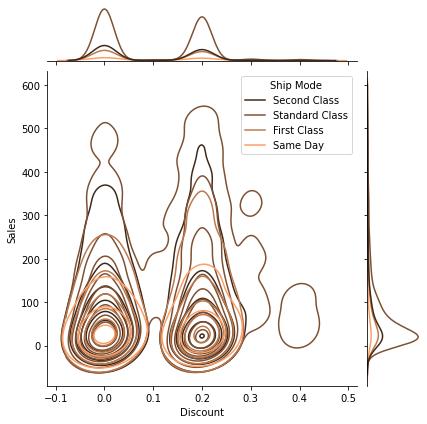

Correlation between Discount and Quantity ==> -0.00828002816948875


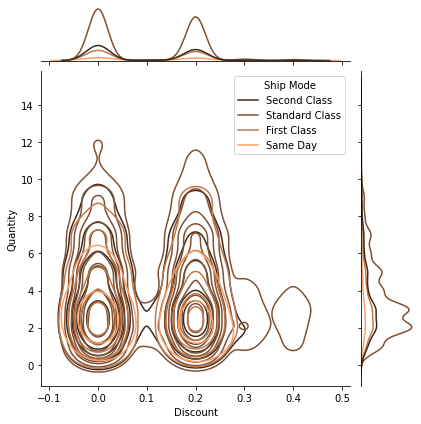

Correlation between Discount and Profit ==> -0.2709426720016834


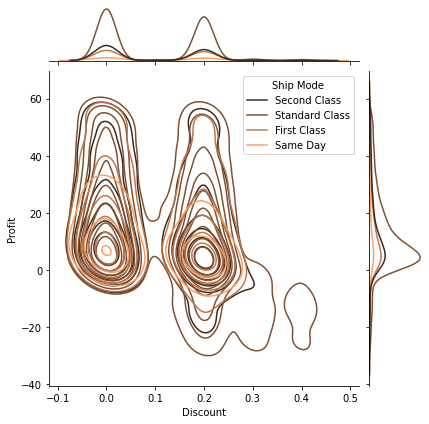

In [101]:
idx = col.index('Sales')
curr_idx = col.index('Discount')
for i in range(idx,len(col)):
    if i!=curr_idx:
        print("Correlation between Discount and {} ==>".format(col[i]),retail_data.corr().loc['Discount'][col[i]])
        sns.jointplot(x='Discount',y=col[i],data=retail_data,hue='Ship Mode',palette='copper',kind='kde')
        plt.show()

Correlation between Profit and Sales ==> 0.3880717876417563


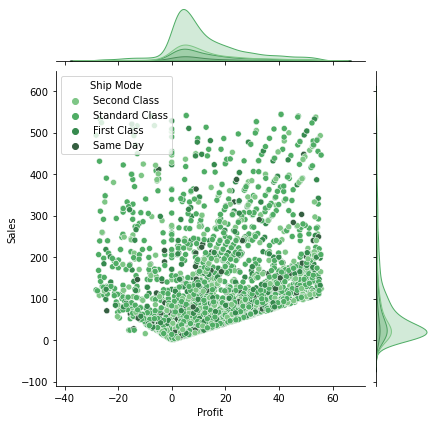

Correlation between Profit and Quantity ==> 0.23279549721092968


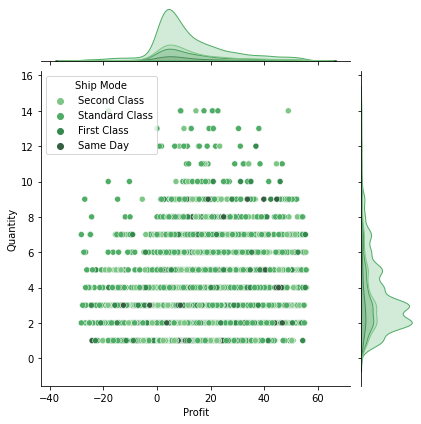

Correlation between Profit and Discount ==> -0.2709426720016834


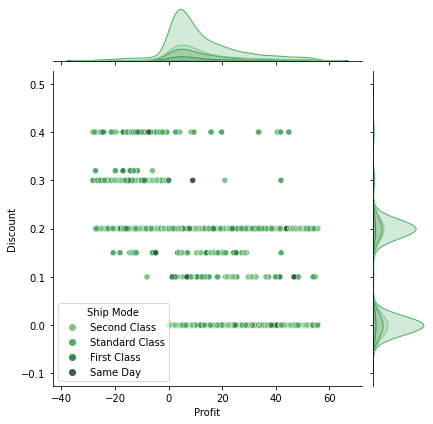

In [102]:
idx = col.index('Sales')
curr_idx = col.index('Profit')
for i in range(idx,len(col)):
    if i!=curr_idx:
        print("Correlation between Profit and {} ==>".format(col[i]),retail_data.corr().loc['Profit'][col[i]])
        sns.jointplot(x='Profit',y=col[i],data=retail_data,hue='Ship Mode',palette='Greens_d')
        plt.show()

# There is a mild positive correlation between quantity and profit i.e. on increasing quantity of sales, profit increases and vice versa.

# Thankyou